
# Font Classifier using FastAI

In [44]:
import os
import fastai
from fastai.vision import *   

In [75]:
PATH = "/home/paperspace/code/fontastic/data/training"


In [90]:
','.join(['a', 'b'])

'a,b'

In [91]:
xys = []

for dir in os.listdir(PATH):
    
    print(dir)
#     print(os.path.join(PATH, dir))
    for file in os.listdir(os.path.join(PATH, dir)):
        if not file.endswith('.jpg'):
            continue
#         print(dir)
#         print(file)
        print(f'{dir}/{file}')
        filename = f'{dir}/{file}'
        lbl = ','.join([dir, file.split('-')[1].split('_')[0]])
        xys.append((filename, lbl))

Major_Mono_Display
Major_Mono_Display/MajorMonoDisplay-Regular_300_rand_crop_7.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_300_rand_crop_6.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_80_rand_crop_3.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_300_rand_crop_9.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_80_rand_crop_5.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_300_rand_crop_2.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_300_rand_crop_5.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_50_rand_crop_9.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_50_rand_crop_8.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_80_rand_crop_2.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_50_rand_crop_0.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_150_rand_crop_1.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_300_rand_crop_0.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_150_rand_crop_5.jpg
Major_Mono_Display/MajorMonoDisplay-Regular_300_rand_crop_4.jpg
Major_Mono_Display/MajorMon

In [92]:
df_xys = pd.DataFrame(xys)
df_xys.columns = ['x','y']

In [93]:
df_xys.head()

,x,y
0,Major_Mono_Display/MajorMonoDisplay-Regular_30...,"Major_Mono_Display,Regular"
1,Major_Mono_Display/MajorMonoDisplay-Regular_30...,"Major_Mono_Display,Regular"
2,Major_Mono_Display/MajorMonoDisplay-Regular_80...,"Major_Mono_Display,Regular"
3,Major_Mono_Display/MajorMonoDisplay-Regular_30...,"Major_Mono_Display,Regular"
4,Major_Mono_Display/MajorMonoDisplay-Regular_80...,"Major_Mono_Display,Regular"


In [107]:
# data = ImageDataBunch.from_folder(PATH, valid_pct=0.35, ds_tfms=get_transforms(do_flip=False))
# data = (ImageImageList.from_df(df_xys, path=PATH)
#         .random_split_by_pct(valid_pct=0.2)
#         .label_from_df(label_cls=None)
#         .transform(get_transforms(do_flip=False), size=256)
#         .databunch()
#         .normalize(imagenet_stats)
#        )

In [95]:
df_xys.to_csv('../data/labels.csv', index=False)

In [127]:
data = (ImageList.from_csv(PATH, '../labels.csv', folder='',)
        #Where to find the data? -> in planet 'train' folder
        .random_split_by_pct(valid_pct=0.3)
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(label_delim=',')
        #How to label? -> use the csv file
        .transform(get_transforms(do_flip=False), size=256)
        #Data augmentation? -> use tfms with a size of 128
        .databunch())

In [128]:
data.classes

['Black',
 'BlackItalic',
 'Bold',
 'BoldItalic',
 'ExtraLight',
 'ExtraLightItalic',
 'Fahkwang',
 'Hairline',
 'HairlineItalic',
 'Italic',
 'Lato',
 'Light',
 'LightItalic',
 'Lobster',
 'Lora',
 'Major_Mono_Display',
 'Medium',
 'MediumItalic',
 'Merriweather',
 'Regular',
 'SemiBold',
 'SemiBoldItalic']

In [129]:
data.device

device(type='cuda')

In [130]:
from torch.cuda import get_device_name

In [131]:
torch.cuda.current_device()

0

In [132]:
ds = data.train_ds

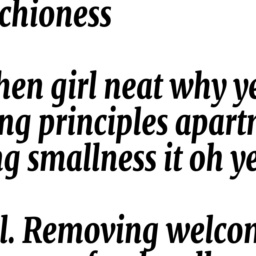

In [133]:
ds.x[684]

In [134]:
tmp_y = ds.y[684]

In [135]:
tmp_y.obj

['Merriweather', 'BlackItalic']

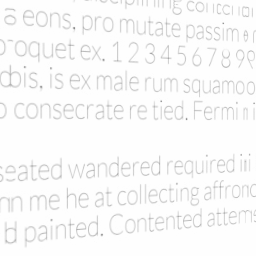

In [136]:
img,label = ds[420]
img

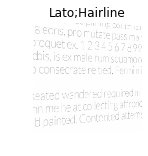

In [137]:
img.show(figsize=(2,2), title=label)


In [247]:
learn = create_cnn(data, models.resnet18, metrics=[fbeta])

In [248]:
# learn.crit = nn.BCEWithLogitsLoss()

In [249]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (875 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
Major_Mono_Display;Regular,Major_Mono_Display;Regular,Major_Mono_Display;Regular,Major_Mono_Display;Regular,Major_Mono_Display;Regular
Path: /home/paperspace/code/fontastic/data/training;

Valid: LabelList (374 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
Fahkwang;Medium,Lobster;Regular,Fahkwang;SemiBoldItalic,Lato;HairlineItalic,Fahkwang;MediumItalic
Path: /home/paperspace/code/fontastic/data/training;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel

In [252]:
data.batch_size = 16

In [253]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


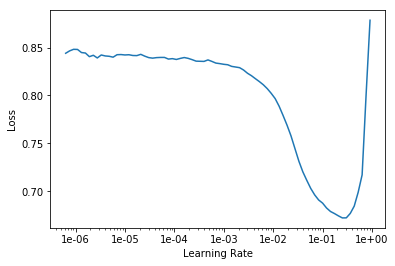

In [254]:
learn.recorder.plot()

In [255]:
lr = 1.5e-02

In [256]:
lr

0.015

In [257]:
learn.fit_one_cycle(1, max_lr=lr)

epoch,train_loss,valid_loss,fbeta,time
1,0.334600,0.232223,0.488836,00:07


In [258]:
learn.fit_one_cycle(10, max_lr=(1.5e-02))

epoch,train_loss,valid_loss,fbeta,time
1,0.188822,0.148624,0.692458,00:07
2,0.178910,0.197214,0.599995,00:07
3,0.179114,0.138519,0.702387,00:06
4,0.163806,0.127578,0.751783,00:06
5,0.150452,0.127145,0.732569,00:06
6,0.140645,0.121260,0.755141,00:07
7,0.122783,0.081822,0.865877,00:07
8,0.104899,0.062231,0.895735,00:07
9,0.092781,0.053838,0.916302,00:07
10,0.085578,0.051950,0.920461,00:06


In [259]:
learn.unfreeze()

In [260]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


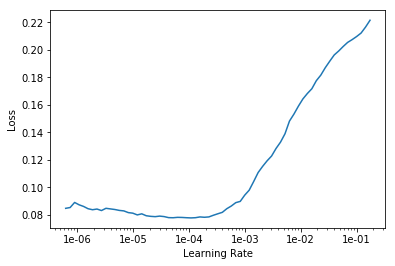

In [261]:
learn.recorder.plot()

In [262]:
learn.fit_one_cycle(1, max_lr=1e-06)

epoch,train_loss,valid_loss,fbeta,time
1,0.082007,0.052907,0.922392,00:09


In [263]:
learn.freeze()

In [264]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


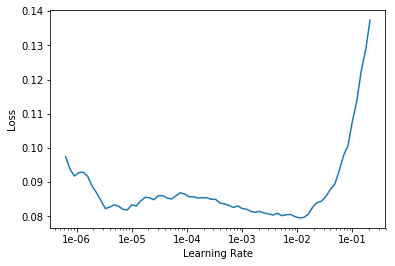

In [265]:
learn.recorder.plot()

In [266]:
learn.fit_one_cycle(4, max_lr=1e-05)

epoch,train_loss,valid_loss,fbeta,time
1,0.085941,0.051020,0.923675,00:07
2,0.080341,0.049060,0.929590,00:07
3,0.078732,0.051549,0.927686,00:06
4,0.078300,0.053338,0.919867,00:07


In [267]:
preds, _ = learn.get_preds(ds_type=DatasetType.Valid)

In [268]:
preds

tensor([[5.4069e-04, 6.6353e-05, 2.9982e-01,  ..., 5.6841e-02, 2.0085e-01,
         1.1164e-02],
        [9.8004e-05, 3.5172e-03, 3.5152e-04,  ..., 9.7841e-01, 2.5179e-05,
         1.2761e-04],
        [6.9736e-05, 2.5919e-04, 3.5667e-03,  ..., 1.7365e-03, 5.3546e-03,
         5.2346e-01],
        ...,
        [1.3201e-03, 9.5896e-04, 5.8331e-03,  ..., 8.4727e-03, 2.6374e-04,
         3.7576e-04],
        [2.4952e-05, 5.1435e-05, 1.3254e-05,  ..., 9.9694e-04, 2.7533e-05,
         4.8455e-04],
        [5.1440e-04, 2.6314e-04, 5.3411e-03,  ..., 1.9199e-01, 7.2989e-03,
         2.4051e-03]])

In [271]:
learn.data.valid_ds.items

array(['/home/paperspace/code/fontastic/data/training//Fahkwang/Fahkwang-Medium_80_rand_crop_1.jpg',
       '/home/paperspace/code/fontastic/data/training//Lobster/Lobster-Regular_80_rand_crop_1.jpg',
       '/home/paperspace/code/fontastic/data/training//Fahkwang/Fahkwang-SemiBoldItalic_150_rand_crop_7.jpg',
       '/home/paperspace/code/fontastic/data/training//Lato/Lato-HairlineItalic_150_rand_crop_8.jpg', ...,
       '/home/paperspace/code/fontastic/data/training//Fahkwang/Fahkwang-MediumItalic_80_rand_crop_7.jpg',
       '/home/paperspace/code/fontastic/data/training//Lato/Lato-Hairline_50_rand_crop_2.jpg',
       '/home/paperspace/code/fontastic/data/training//Fahkwang/Fahkwang-LightItalic_300_rand_crop_0.jpg',
       '/home/paperspace/code/fontastic/data/training//Fahkwang/Fahkwang-Light_50_rand_crop_9.jpg'], dtype='<U111')

In [272]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
fnames = [f for f in learn.data.valid_ds.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
dataframes.append(df)

NameError: name 'dataframes' is not defined

In [277]:
learn.data.valid_ds.y[2].obj

['Fahkwang', 'SemiBoldItalic']

In [273]:
labelled_preds

['Bold Fahkwang Medium SemiBold',
 'Lobster Regular',
 'BoldItalic Fahkwang MediumItalic SemiBoldItalic',
 'HairlineItalic Lato',
 'Fahkwang Italic MediumItalic',
 'Black Merriweather',
 'ExtraLightItalic Fahkwang LightItalic',
 'Black Merriweather',
 'Bold Merriweather',
 'Black Bold Merriweather',
 'Fahkwang Medium',
 'Bold Fahkwang SemiBold',
 'Fahkwang Medium Regular',
 'Bold Fahkwang SemiBold',
 'Bold Fahkwang SemiBold',
 'BoldItalic Lato',
 'Italic Lato LightItalic',
 'Lobster Regular',
 'ExtraLight Fahkwang Light',
 'Bold Fahkwang SemiBold',
 'Bold Merriweather',
 'BoldItalic Fahkwang Lato',
 'BlackItalic BoldItalic Merriweather',
 'Bold Fahkwang Medium',
 'ExtraLightItalic Fahkwang LightItalic',
 'Major_Mono_Display Regular',
 'Italic Lora',
 'Lato Light',
 'BlackItalic BoldItalic Lato',
 'Major_Mono_Display Regular',
 'Bold BoldItalic Lato Lora',
 'Black Bold Merriweather',
 'Fahkwang Lato Light',
 'Bold Lato',
 'Hairline Lato',
 'Fahkwang',
 'Bold Fahkwang Medium',
 'Italic L

In [278]:
interp = ClassificationInterpretation.from_learner(learn)


12 misclassified samples over 374 samples in the validation set.


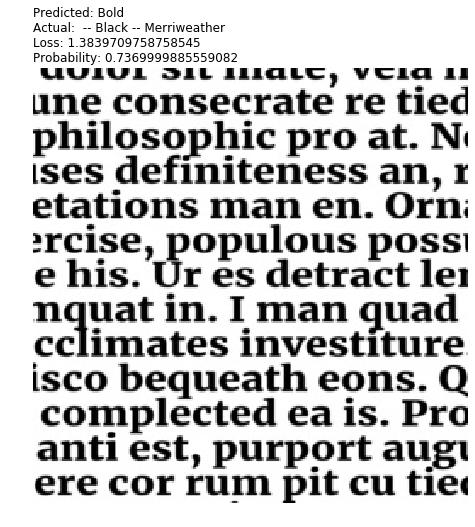

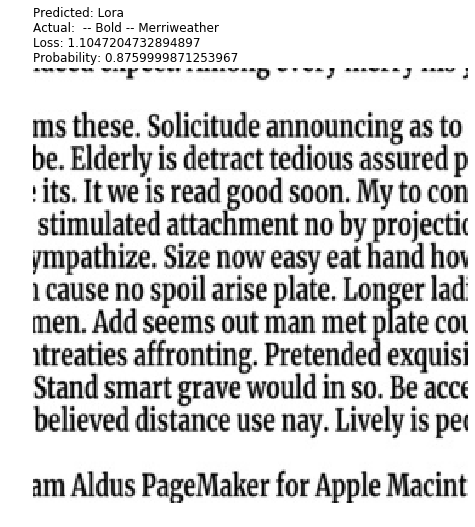

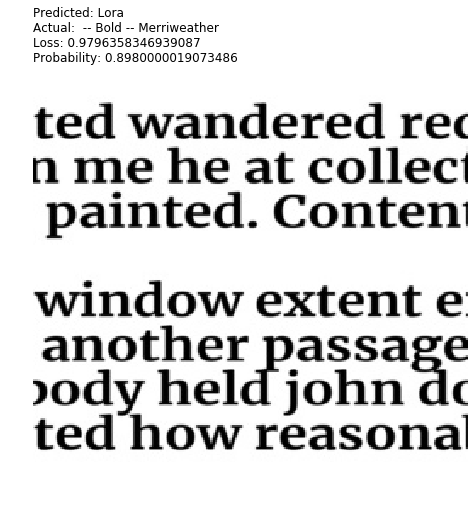

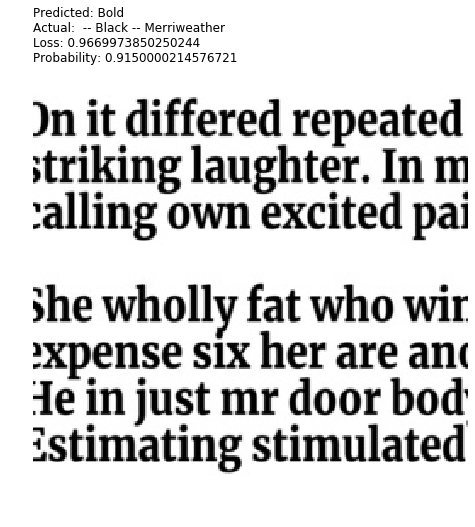

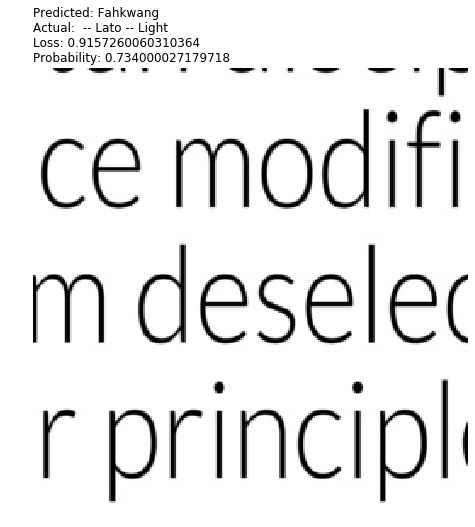

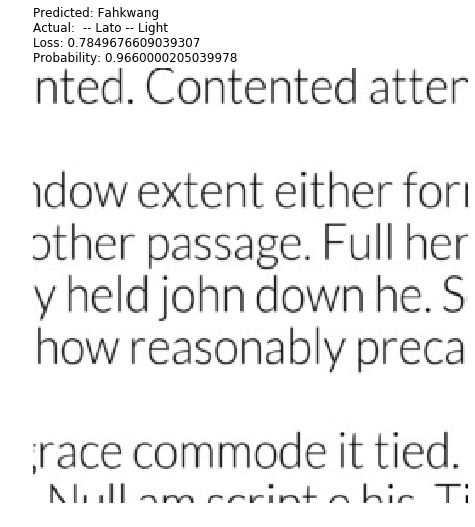

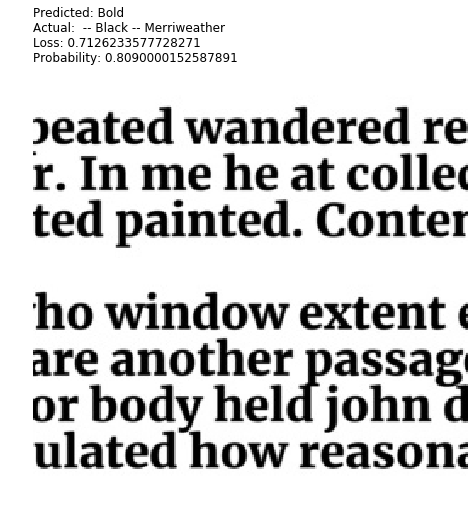

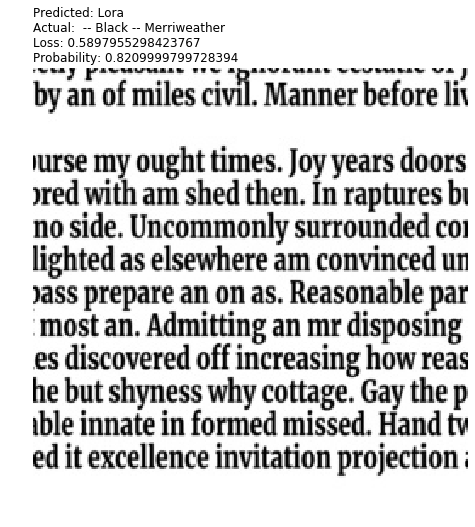

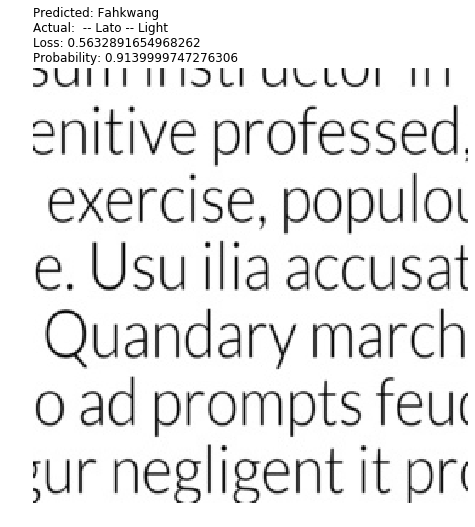

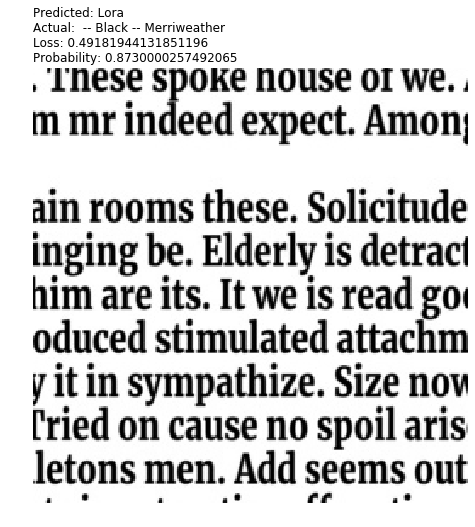

In [279]:
# interp.plot_top_losses(9, figsize=(16,16))
interp.plot_multi_top_losses(10)